### CS4423 - Networks
Angela Carnevale  
School of Mathematical and Statistical Sciences  
University of Galway

# Assignment 2

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, please **print** this notebook into a **PDF** file and submit this to
**Canvas**. Please note that you don't need to "convert" to PDF, it's enough to Print to PDF (and it should be much easier to do).

**Deadline.** Tuesday 27 February at 5pm. 

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended on the webpage of the module.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [6]:
import networkx as nx
from queue import Queue
import pandas as pd ## can be used to visualise data arising from computing centrality measures
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1. Breadth First Search.

Breadth First Search (BFS) is a versatile and efficient strategy for systematically visiting
all the nodes in a graph.

Given a graph $G = (X, E)$ and a starting point $x \in X$, BFS can be described as the following sequence of steps.

1. mark all nodes of $G$ as "unseen".

2. initialize a list `seen = [x]` and mark `x` as seen.

3. loop over the elements `y` in the list `seen` and, in each step, visit the
   node `y` and add all of `y`'s neighbors that have not been marked as "seen"
   to the list `seen` and mark them as seen.


## Tasks (10+10+20 marks)

1. Print out all the nodes of $G$ as discovered when the starting point is node `H`.
2. Construct a spanning tree $T2$ of the graph $G$ with node `H` as starting point.
3. [10 marks for BFS, 10 for DFS] Draw $T2$. Using code or otherwise, now visit $T2$ by BFS and DFS and determine the order in which the nodes will be visited if `A` is taken as the starting node.

In [4]:
x = 'H'
for y in G:
    G.nodes[y]['seen'] = False
seen = [x]
G.nodes[x]['seen'] = True
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

H
C
D
E
J
A
B
I
K
F


In [9]:
x = 'H'
T2 = nx.Graph()
for y in G:
    G.nodes[y]['seen'] = False
T2.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T2.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True

T2 = G.edge_subgraph(sub)

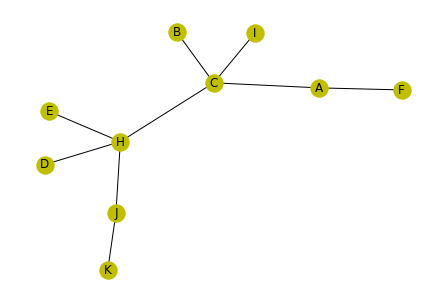

In [10]:
nx.draw(T2,**opts)

... you can write your comments in this box ...

In [11]:
### BFS on tree T2 starting at A

x = 'A'
for y in G:
    G.nodes[y]['seen'] = False
seen = [x]
G.nodes[x]['seen'] = True
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

A
C
E
F
B
I
H
K
D
J


In [12]:
def dfs(tree, x):      
    print(x, end=', ') 
    tree.nodes[x]['seen'] = True
    for z in tree[x]:
        if not tree.nodes[z]['seen']:
            dfs(tree, z)  

In [15]:
for y in T2:
    T2.nodes[y]['seen'] = False
seen = [x]

### DFS on T2 starting at A. 

dfs(T2,x)

A, C, B, I, H, D, E, J, K, F, 

<span style="color:red"> 
    Each Graph/tree traversal is worth 10 marks. Students can do BFS and/or DFS on the tree T2 by hand. Note that the output might slightly differ depending on the ordering of vertices (either in the machine or in their own reading by hand). That is fine, as long as the visits are by breadth and by depth, respectively.  
    </span>
    
    
<span style="color:red">     Should the students attempt but not get a correct output, they should still get some marks (e.g. 40% or 70% for each attempt with a non correct output, depending on the entity of the mistake)</span>

## 2.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of the island of Ireland by
joining two counties whenever they have a common border.

A list of counties and their borders in the adjacency list format
can be found in the nearby file `data/ireland.adj`. 

Remember, you can construct the graph `I` directly from the adjacency list.

## Tasks (10+20 marks)

* What are the order and the size of the resulting graph?

In [16]:
I = nx.read_adjlist('data/ireland.adj')

I.order(), I.size()

(32, 76)

<span style="color:red">5 (easy) marks here for each of the two invariants computed</span>

* In terms of centrality measures, what are the $3$ most central counties, for

    1.  degree centrality?
    1.  eigenvector centrality?
    1.  closeness centrality?
    1.  betweenness centrality?

Please use as many code and as many text cells as needed and make sure to respond to each point.

In [20]:
import numpy as np
import pandas as pd
nx.set_node_attributes(I, nx.degree_centrality(I), 'C^D')
nx.set_node_attributes(I, nx.eigenvector_centrality(I), 'C^E')
nx.set_node_attributes(I, nx.closeness_centrality(I), 'C^C')
nx.set_node_attributes(I, nx.betweenness_centrality(I), 'C^B')

In [28]:
pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index').sort_values('C^D', ascending=False)

,C^D,C^E,C^C,C^B
Tipperary,0.258065,0.258747,0.397436,0.222681
Roscommon,0.225806,0.266327,0.413333,0.162350
Offaly,0.225806,0.327506,0.469697,0.279330
Meath,0.225806,0.289622,0.455882,0.308805
Cavan,0.193548,0.250965,0.387500,0.061483
Tyrone,0.193548,0.142125,0.319588,0.065503
Monaghan,0.193548,0.209616,0.387500,0.132825
Kildare,0.193548,0.234722,0.407895,0.116354
Leitrim,0.193548,0.209394,0.373494,0.120198
Laois,0.161290,0.217561,0.382716,0.043948


1. <span style="color:blue">There's 4 counties of highest **degree centrality** (three on a tie): Tipperary, Roscommon, Offaly, Meath</span>

2. <span style="color:blue">(Similarly... ) There's 3 counties of highest **eigenvector centrality**: Roscommon, Offaly, Meath</span>

3. <span style="color:blue">There's 3 counties of highest **closeness** centrality: Roscommon, Offaly, Meath</span>

4. <span style="color:blue">There's 3 counties of highest **betweenness centrality**: Roscommon, Offaly, Meath</span>

<span style="color:red"> Some students will print only the top 3 counties and that's perfect. If the fact that they are displaying the top three is evident from the code, that's enough (no further comments requirements).</span>

<span style="color:red">5 marks here for each of the rankings with respect to the four centrality measures</span>

## 3. Constructing examples.

## Tasks (10+10+10 marks)

1. Give an example of a graph on 8 vertices all of which have degree centrality equal to 4. For such graph,  also compute the normalised eigenvector, closeness and betweenness centralities. What do you observe? 

1. Determine the normalised degree centrality of the nodes in some
   random trees.  Is there some function of the degree centrality that is constant across your examples? Why?
   
1. Give an example of a graph on $n=6,7,8$ vertices which has a _unique_ node that is highest ranked with respect to normalised degree, closeness and betweenness centrality. Can you think of such an example for any $n$? 


<span style="color:red"> In 1, there are two regular graphs on 8 vertices each of degree 4. In one case, all vertices look the same with respect to all centrality measures. In the other case, degree, eigenvector and closeness centrality are the same for all nodes, while betweenness is different. Students aren't required to explain why, just to record their observations. </span>
    
    * If they give a correct example and make correct observations they get full marks. 
    * If some of the observations are incorrect, only award partial marks, 7/10. 
    * If the example is not correct but attempted, 4/10.

<span style="color:blue"> 2. We can see that the sum of the normalised degree centrality is constant, equal to 2. The reason is that a tree on $n$ vertices has size $n-1$. Hence sum of the degrees is $2(n-1)$ and therefore the normalised degree centrality always sums up to $2$.</span>

<span style="color:red"> In fact, students don't even need to print the trees as they should know this from the handshake lemma from early in the semester. </span>
    
    * Full marks for complete explanation (even if not rigorous)
    * If the explanation isn't precise but students get the idea that this has something to do with the average degree or total degree, they should get partial marks (7/10). 
    * If they print out trees and attempt this but are not on the right track they get 4/10

3. <span style="color:blue"> A star graph on 6, 7, 8 (or $n$) vertices has one single vertex (the one of degree $n-1$) that has highest normalised degree (equal to 1), highest closeness and betweenness centralities (also equal to 1).</span>

<span style="color:red"> Here half of the marks are for producing the examples for $n=6,7,8$, and the remaining half for giving an general example that works for all n. 

...your comments here...